In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 91% 135M/149M [00:01<00:00, 127MB/s]
100% 149M/149M [00:01<00:00, 116MB/s]


In [3]:
import zipfile
zip_data = zipfile.ZipFile('/content/brain-tumor-mri-dataset.zip')
zip_data.extractall('/content')
zip_data.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Input

In [5]:
import matplotlib.pyplot as plt
import cv2

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
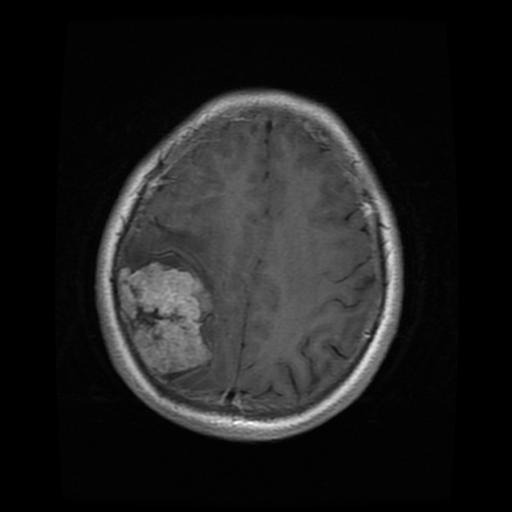

In [6]:
img = cv2.imread('/content/Training/meningioma/Tr-me_0010.jpg')
img

In [7]:
img.shape

(512, 512, 3)

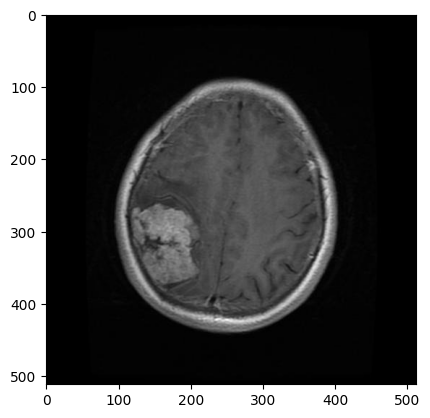

In [8]:
plt.imshow(img)

##Generators

In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Training',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Testing',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


##Normalization

In [10]:
def scale_down_px(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

In [11]:
train_ds = train_ds.map(scale_down_px)
test_ds = test_ds.map(scale_down_px)

#Create a CNN model

In [12]:
model = Sequential()

model.add(Input(shape=(256,256,3)))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,388 (56.64 MB)

 Trainable params: 14,847,940 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 127ms/step - accuracy: 0.6058 - loss: 6.6330 - val_accuracy: 0.3089 - val_loss: 17.5388
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.7390 - loss: 1.0470 - val_accuracy: 0.3715 - val_loss: 1.7208
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.7604 - loss: 0.7987 - val_accuracy: 0.6834 - val_loss: 0.8506
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7869 - loss: 0.6682 - val_accuracy: 0.7567 - val_loss: 0.9167
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.8222 - loss: 0.5636 - val_accuracy: 0.7872 - val_loss: 0.6045
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.8586 - loss: 0.4412 - val_accuracy: 0.8032 - val_loss: 0.5755
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.8808 - loss: 0.3569 - val_accuracy: 0.8680 - val_loss: 0.3868
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.8994 - loss: 0.2995 

#Training/Validation Accuracy Graph


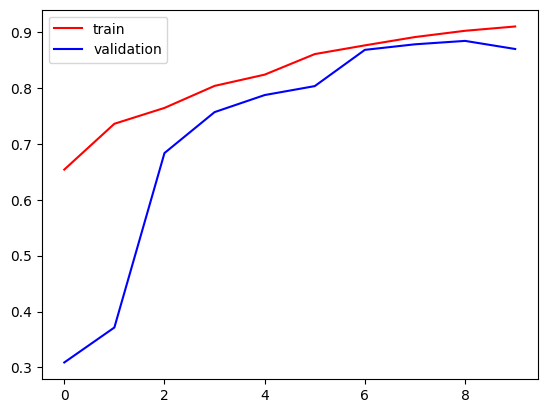

In [16]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

#Training/Validation Loss Graph

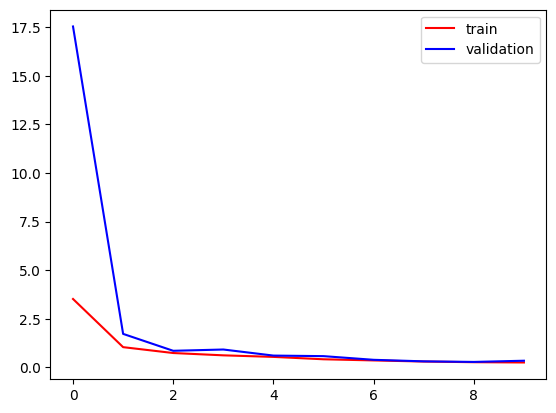

In [17]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

#Test the model

In [38]:
test_img = cv2.imread('/content/Testing/pituitary/Te-pi_0011.jpg')

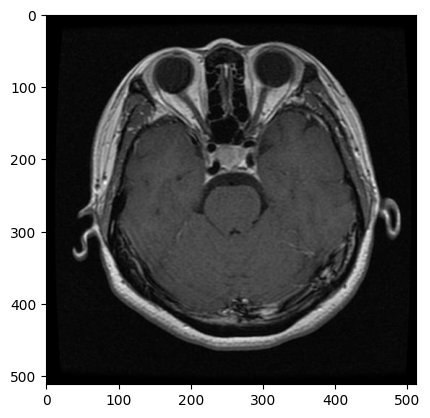

In [39]:
plt.imshow(test_img)

In [40]:
test_img.shape

(512, 512, 3)

In [41]:
test_img = cv2.resize(test_img, (256, 256))

In [42]:
test_img = test_img / 255.0

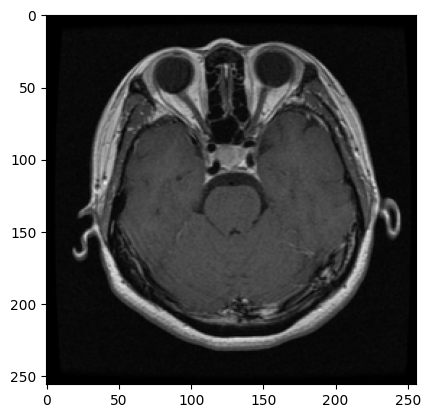

In [43]:
plt.imshow(test_img)

In [44]:
test_input = test_img.reshape(1, 256, 256, 3)

In [45]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[8.416443e-12, 9.840750e-06, 1.717987e-10, 9.999901e-01]],
      dtype=float32)

In [46]:
model.predict(test_input)[0].argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


3

In [47]:
output = model.predict(test_input)[0].argmax()

# The dictionary 'value' maps class indices to their labels
value = {
    0: 'Glioma Tumor',
    1: 'Meningioma Tumor',
    2: 'No Tumor',
    3: 'Pituitary Tumor'
}

# Use the output index to fetch the correct label
predicted_label = list(value.values())[output]

print(f'Output index is: {output}')
print(f'Predicted class label: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Output index is: 3
Predicted class label: Pituitary Tumor
